### About
Using ORB on the CAM2BEV dataset.

In [2]:
import cv2
import numpy as np

import PIL
import matplotlib.pyplot as plt

In [3]:
# Load the images 
# Image 2 is always right neighor
image1 = cv2.imread('../data/left.png')
image2 = cv2.imread('../data/front.png')


In [4]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#### ORB keypoint detection

In [5]:
orb = cv2.ORB_create()

kp1, descrip1 = orb.detectAndCompute(gray1, None)
kp2, descrip2 = orb.detectAndCompute(gray2, None)

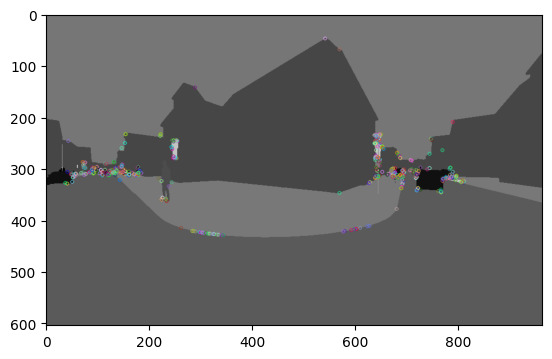

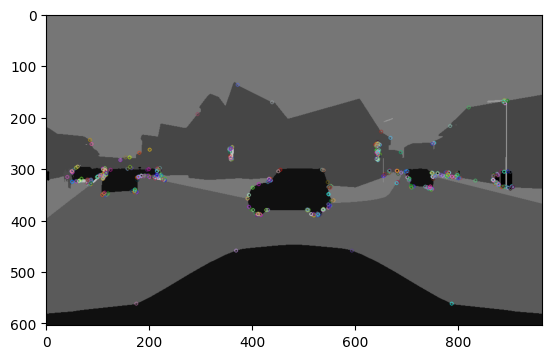

In [6]:
plt.imshow(cv2.drawKeypoints(gray1, kp1, None, flags=0))
plt.show()
plt.imshow(cv2.drawKeypoints(gray2, kp2, None, flags=0))

In [7]:
FLANN_INDEX_LSH = 6
DIST_THRESH = .55
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 10) #2

search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(descrip1, descrip2, k=2)

matchesMask = [[0,0] for i in range(len(matches))]

# Lowe's ratio for draw parameters
for i, (m,n) in enumerate(matches):
    if m.distance < DIST_THRESH*n.distance:
        matchesMask[i]=[1,0]


draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

# Lowe's ratio test to filter matches
good_matches = []
for m,n in matches:
    if m.distance < DIST_THRESH * n.distance:
        good_matches.append(m)



#### Performing KNN matching

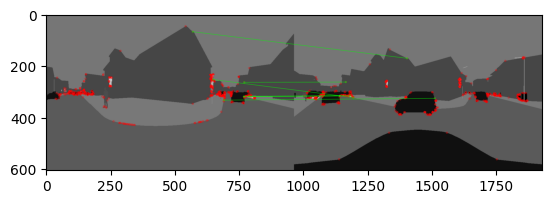

(<matplotlib.image.AxesImage at 0x2030a387280>, None)

In [8]:
img3 = cv2.drawMatchesKnn(gray1, kp1, gray2, kp2, matches, None, **draw_params)

plt.imshow(img3), plt.show()

Stitching on this dataset doesn't work too well.

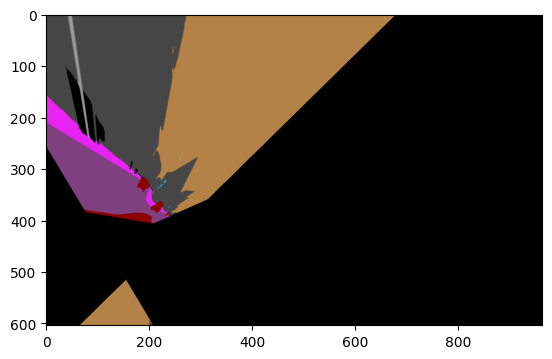

(<matplotlib.image.AxesImage at 0x2030a438af0>, None)

In [9]:

src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2) 

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 10.0)
w, h = gray2.shape

# Use homography to warp image2
transformed_img = cv2.warpPerspective(image2, M, (h, w))

plt.imshow(transformed_img), plt.show()

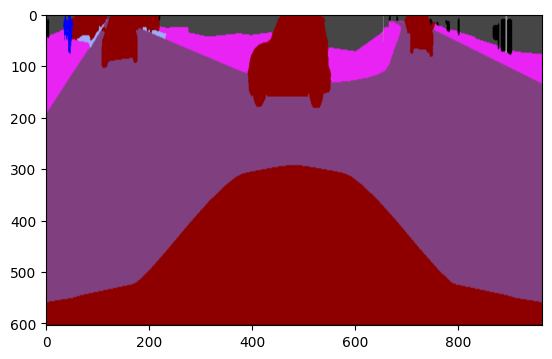

(<matplotlib.image.AxesImage at 0x2030805f070>, None)

In [50]:
height, width = image2.shape[:2]

src_points = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)

dst_points = np.array([[0,0], [width, 0], [0, height], [width, height]], dtype=np.float32)

M1 = cv2.getPerspectiveTransform(src_points, dst_points)

warped = cv2.warpPerspective(image2, M1, (width, height))
plt.imshow(warped), plt.show()

#### Conclusion
The results aren't as good as expected, so we'll move to other datasets.